## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Nov 12 17:10:49 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.86.05              Driver Version: 535.86.05    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX 6000 Ada Gene...    On  | 00000000:41:00.0 Off |                  Off |
| 30%   43C    P8              28W / 300W |      4MiB / 49140MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [8]:
!killall python

: 

Installing cuDNN & pytorch - Setting environmental variables

In [ ]:
import platform
print(platform.system())
if 'windows' in platform.system():
    %pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
else:
    print('running on linux')
    %pip install torch torchvision torchaudio
    %pip install torch torchvision torchaudio -U
%pip install comet_ml --quiet
# pip install comet_ml
#%env CUDA_PATH = "E:\software\cuDNN\cudnn-windows-x86_64-8.9.5.29_cuda12-archive"
import torch
import torchvision
print(torch.cuda.__path__)
print(torch.version.cuda)

#torch.from_numpy(boxes.detach().cpu().numpy())


torch.cuda.is_available()


Linux
running on linux


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
['/home/wchuter/Willie-ML/GEEN1400-Final-Project/venv/lib/python3.10/site-packages/torch/cuda']
12.1


True

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/home/wchuter/Willie-ML/GEEN1400-Final-Project


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:

# Pip install method (recommended)

#%pip install ultralytics==8.0.20
#%pip  install ultralytics
%pip install ultralytics

from IPython import display
#display.clear_output()

import ultralytics
ultralytics.checks()

import torch
GPUS_AVALIBLE = torch.cuda.device_count()
print(GPUS_AVALIBLE)


Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA RTX 6000 Ada Generation, 48647MiB)
Setup complete ✅ (128 CPUs, 503.5 GB RAM, 301.9/1758.9 GB disk)


2


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [ ]:
#%mkdir {HOME}
%cd {HOME}


import dotenv
dotenv.load_dotenv(".env")

ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY")

%pip install roboflow --quiet
#%pip install ultralytics==8.0.134

from roboflow import Roboflow
rf = Roboflow(api_key="vFBCQUPZEIwkQ9xEqkDu")
project = rf.workspace("trashclassification-tayqe").project("trash-xvysc")
dataset = project.version(2).download("yolov8",overwrite=False, location=f"{HOME}//datasets")
dataset_version = dataset.version

/home/wchuter/Willie-ML/GEEN1400-Final-Project


Note: you may need to restart the kernel to use updated packages.
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.200, to fix: `pip install ultralytics==8.0.134`


## Custom Training

In [3]:
#%run scripts/train.py

#CLASSIFY requirements
"""
imgsz=224
task=classify
dataset must be heiracel or clip
dataset objects must be isolated for classification
"""

from scripts.train import YOLO_Trainer

model = "yolov8x-cls.pt"
clean_model =  model.removesuffix(".pt")

task = "classify"
imgsz = 224

cstm_class = YOLO_Trainer(model=model, task=task)

cstm_class.train("trash-classification",task=task,bs=64, name=clean_model, exist_ok=True, export='torchscript',  imgsz = 224, cache=True)
cstm_class.model.benchmark(data=cstm_class.dataset.location)

Setup complete ✅ (128 CPUs, 503.5 GB RAM, 355.6/1758.9 GB disk)

Benchmarks complete for yolov8x-cls.pt on /home/wchuter/Willie-ML/GEEN1400-Final-Project/datasets/trash-2/clip at imgsz=224 (302.85s)
                   Format Status❔  Size (MB)  metrics/accuracy_top1  Inference time (ms/im)
0                 PyTorch       ✅      109.7                 0.8113                    4.82
1             TorchScript       ✅      214.4                 0.8082                    4.40
2                    ONNX       ✅      214.2                 0.8082                   23.08
3                OpenVINO       ❌        0.0                    NaN                     NaN
4                TensorRT       ✅      216.9                 0.8082                    1.78
5                  CoreML       ❌        0.0                    NaN                     NaN
6   TensorFlow SavedModel       ❌        0.0                    NaN                     NaN
7     TensorFlow GraphDef       ❌        0.0                    N

,Format,Status❔,Size (MB),metrics/accuracy_top1,Inference time (ms/im)
0,PyTorch,✅,109.7,0.8113,4.82
1,TorchScript,✅,214.4,0.8082,4.40
2,ONNX,✅,214.2,0.8082,23.08
3,OpenVINO,❌,0.0,NaN,NaN
4,TensorRT,✅,216.9,0.8082,1.78
5,CoreML,❌,0.0,NaN,NaN
6,TensorFlow SavedModel,❌,0.0,NaN,NaN
7,TensorFlow GraphDef,❌,0.0,NaN,NaN
8,TensorFlow Lite,❌,0.0,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN


In [2]:
from ultralytics import YOLO
from torchinfo import summary
from torchvision import models



#model = YOLO("trash-classification/yolov8m/weights/best.pt")
#print(model.info(detailed=True))

#model = YOLO("trash-classification/yolov8l-cls/weights/best.pt")
model = YOLO("yolov8x-cls")
model.export(format="torchscript")
#model.benchmark(data="datasets/trash-2/clip")
# pt_model = YOLO("trash-classification/yolov8m/weights/best.pt")
# print(pt_model.info(detailed=True))
# print(pt_model)
#print(vgg)
#print(model)


image 1/1 /home/wchuter/Willie-ML/GEEN1400-Final-Project/venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x640 Plastic 0.94, Metal 0.03, Paper 0.02, Cardboard 0.00, Trash 0.00, 7.0ms
Speed: 3.4ms preprocess, 7.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
train: /home/wchuter/Willie-ML/GEEN1400-Final-Project/datasets/trash-2/clip/train... found 3330 images in 7 classes ✅ 
val: /home/wchuter/Willie-ML/GEEN1400-Final-Project/datasets/trash-2/clip/val... found 318 images in 7 classes ✅ 
test: /home/wchuter/Willie-ML/GEEN1400-Final-Project/datasets/trash-2/clip/test... found 158 images in 7 classes ✅ 
val: Scanning /home/wchuter/Willie-ML/GEEN1400-Final-Project/datasets/trash-2/clip/val... 318 images, 0 corrupt: 100%|██████████| 318/318 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 318/318 [00:02<00:00, 108.86it/s]
                   all      0.814      0.994
Speed: 0.2ms preprocess, 7.2ms inference, 0.0ms loss, 0.0m

[11/12/2023-17:13:03] [TRT] [I] [MemUsageChange] Init CUDA: CPU +563, GPU +0, now: CPU 3761, GPU 2158 (MiB)
[11/12/2023-17:13:03] [TRT] [I] [MemUsageChange] Init builder kernel library: CPU +433, GPU +106, now: CPU 4214, GPU 2264 (MiB)
[11/12/2023-17:13:04] [TRT] [I] ----------------------------------------------------------------
[11/12/2023-17:13:04] [TRT] [I] Input filename:   trash-classification/yolov8l-cls/weights/best.onnx
[11/12/2023-17:13:04] [TRT] [I] ONNX IR version:  0.0.8
[11/12/2023-17:13:04] [TRT] [I] Opset version:    17
[11/12/2023-17:13:04] [TRT] [I] Producer name:    pytorch
[11/12/2023-17:13:04] [TRT] [I] Producer version: 2.1.0
[11/12/2023-17:13:04] [TRT] [I] Domain:           
[11/12/2023-17:13:04] [TRT] [I] Model version:    0
[11/12/2023-17:13:04] [TRT] [I] Doc string:       
[11/12/2023-17:13:04] [TRT] [I] ----------------------------------------------------------------


TensorRT: input "images" with shape(1, 3, 640, 640) DataType.FLOAT
TensorRT: output "output0" with shape(1, 7) DataType.FLOAT
TensorRT: building FP32 engine as trash-classification/yolov8l-cls/weights/best.engine


[11/12/2023-17:13:04] [TRT] [W] onnx2trt_utils.cpp:369: Your ONNX model has been generated with INT64 weights, while TensorRT does not natively support INT64. Attempting to cast down to INT32.
[11/12/2023-17:13:04] [TRT] [I] [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +32, now: CPU 4353, GPU 2292 (MiB)
[11/12/2023-17:13:04] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 4353, GPU 2324 (MiB)
[11/12/2023-17:13:04] [TRT] [W] TensorRT was linked against cuDNN 8.4.1 but loaded cuDNN 8.4.0
[11/12/2023-17:13:04] [TRT] [I] Local timing cache in use. Profiling results in this builder pass will not be stored.
[11/12/2023-17:13:20] [TRT] [I] Some tactics do not have sufficient workspace memory to run. Increasing workspace size will enable more tactics, please check verbose output for requested sizes.
[11/12/2023-17:13:50] [TRT] [I] Detected 1 inputs and 1 output network tensors.
[11/12/2023-17:13:50] [TRT] [I] Total Host Persistent Memory: 109472
[11/12/2023-17:13:50] [TR

TensorRT: export success ✅ 49.9s, saved as 'trash-classification/yolov8l-cls/weights/best.engine' (161.2 MB)

Export complete (49.9s)
Results saved to /home/wchuter/Willie-ML/GEEN1400-Final-Project/trash-classification/yolov8l-cls/weights
Predict:         yolo predict task=classify model=trash-classification/yolov8l-cls/weights/best.engine imgsz=640  
Validate:        yolo val task=classify model=trash-classification/yolov8l-cls/weights/best.engine imgsz=640 data=/home/wchuter/Willie-ML/GEEN1400-Final-Project/datasets/trash-2/clip  
Visualize:       https://netron.app
Loading trash-classification/yolov8l-cls/weights/best.engine for TensorRT inference...


[11/12/2023-17:13:50] [TRT] [W] The getMaxBatchSize() function should not be used with an engine built from a network created with NetworkDefinitionCreationFlag::kEXPLICIT_BATCH flag. This function will always return 1.
[11/12/2023-17:13:50] [TRT] [I] The logger passed into createInferRuntime differs from one already provided for an existing builder, runtime, or refitter. Uses of the global logger, returned by nvinfer1::getLogger(), will return the existing value.

[11/12/2023-17:13:50] [TRT] [I] [MemUsageChange] Init CUDA: CPU +0, GPU +0, now: CPU 4243, GPU 2262 (MiB)



image 1/1 /home/wchuter/Willie-ML/GEEN1400-Final-Project/venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x640 Plastic 0.94, Metal 0.03, Paper 0.02, Cardboard 0.00, Trash 0.00, 2.5ms
Speed: 2.1ms preprocess, 2.5ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Loading trash-classification/yolov8l-cls/weights/best.engine for TensorRT inference...


[11/12/2023-17:13:50] [TRT] [I] Loaded engine size: 161 MiB
[11/12/2023-17:13:50] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 4415, GPU 2454 (MiB)
[11/12/2023-17:13:50] [TRT] [W] TensorRT was linked against cuDNN 8.4.1 but loaded cuDNN 8.4.0
[11/12/2023-17:13:50] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +0, now: CPU 0, GPU 0 (MiB)
[11/12/2023-17:13:50] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 4254, GPU 2454 (MiB)
[11/12/2023-17:13:50] [TRT] [W] TensorRT was linked against cuDNN 8.4.1 but loaded cuDNN 8.4.0
[11/12/2023-17:13:50] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +0, now: CPU 0, GPU 0 (MiB)
[11/12/2023-17:13:50] [TRT] [I] The logger passed into createInferRuntime differs from one already provided for an existing builder, runtime, or refitter. Uses of the global logger, returned by nvinfer1::getLogger(), will return the existing 

train: /home/wchuter/Willie-ML/GEEN1400-Final-Project/datasets/trash-2/clip/train... found 3330 images in 7 classes ✅ 
val: /home/wchuter/Willie-ML/GEEN1400-Final-Project/datasets/trash-2/clip/val... found 318 images in 7 classes ✅ 
test: /home/wchuter/Willie-ML/GEEN1400-Final-Project/datasets/trash-2/clip/test... found 158 images in 7 classes ✅ 


[11/12/2023-17:13:50] [TRT] [I] Loaded engine size: 161 MiB
[11/12/2023-17:13:50] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 4428, GPU 2746 (MiB)
[11/12/2023-17:13:50] [TRT] [W] TensorRT was linked against cuDNN 8.4.1 but loaded cuDNN 8.4.0
[11/12/2023-17:13:50] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +0, now: CPU 0, GPU 0 (MiB)
[11/12/2023-17:13:50] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 4267, GPU 2748 (MiB)
[11/12/2023-17:13:50] [TRT] [W] TensorRT was linked against cuDNN 8.4.1 but loaded cuDNN 8.4.0
[11/12/2023-17:13:50] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +0, now: CPU 0, GPU 0 (MiB)


val: Scanning /home/wchuter/Willie-ML/GEEN1400-Final-Project/datasets/trash-2/clip/val... 318 images, 0 corrupt: 100%|██████████| 318/318 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 318/318 [00:01<00:00, 229.32it/s]
                   all      0.827      0.984
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 0.0ms postprocess per image
ERROR ❌️ Benchmark failure for CoreML: inference not supported on GPU

PyTorch: starting from 'trash-classification/yolov8l-cls/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7) (69.2 MB)

TensorFlow SavedModel: starting export with tensorflow 2.14.0...

ONNX: starting export with onnx 1.14.1 opset 17...
ONNX: simplifying with onnxsim 0.4.35...
ONNX: export success ✅ 4.0s, saved as 'trash-classification/yolov8l-cls/weights/best.onnx' (138.1 MB)
TensorFlow SavedModel: running 'onnx2tf -i "trash-classification/yolov8l-cls/weights/best.onnx" -o "trash-classification/yolov8l-cls/weight

Exporting inference model from python code ('/home/wchuter/Willie-ML/GEEN1400-Final-Project/trash-classification/yolov8l-cls/weights/best_paddle_model/x2paddle_code.py')... 



I1112 17:14:31.541060 441103 interpretercore.cc:237] New Executor is Running.
PaddlePaddle: export success ✅ 3.3s, saved as 'trash-classification/yolov8l-cls/weights/best_paddle_model/' (276.3 MB)

Export complete (3.5s)
Results saved to /home/wchuter/Willie-ML/GEEN1400-Final-Project/trash-classification/yolov8l-cls/weights
Predict:         yolo predict task=classify model=trash-classification/yolov8l-cls/weights/best_paddle_model imgsz=640  
Validate:        yolo val task=classify model=trash-classification/yolov8l-cls/weights/best_paddle_model imgsz=640 data=/home/wchuter/Willie-ML/GEEN1400-Final-Project/datasets/trash-2/clip  
Visualize:       https://netron.app
Loading trash-classification/yolov8l-cls/weights/best_paddle_model for PaddlePaddle inference...
--- Running analysis [ir_graph_build_pass]
I1112 17:14:32.648773 441103 executor.cc:187] Old Executor is Running.
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [lay

KeyboardInterrupt: 

In [ ]:


import comet_ml
import dotenv
dotenv.load_dotenv(".env")



# experiment = comet_ml.Experiment(
#     project_name="trash-classification"
# )
gpu_array = [x for x in range(0,GPUS_AVALIBLE)]
gpu_array = ",".join(str(e) for e in gpu_array)
%env CUDA_VISIBLE_DEVICES={gpu_array}
%env OMP_NUM_THREADS=16

experiment = comet_ml.Experiment(project_name="trash-classification")




from IPython import display


%cd {HOME}


from ultralytics import YOLO
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_properties(0).name)
print("hello")

#model_path = "runs\detect\\train36\\weights\\best.pt"

#model = YOLO(model_path, task='detect')  # load a pretrained model (recommended for training)

%cd {HOME}
#name=  "trash-classifier_v1"
#project_directory = f"{HOME}/runs"
model_name  = "yolov8n.pt"
bs = 30
epochs = 75
if GPUS_AVALIBLE >1:
    experiment.add_tag(model_name)
    experiment.add_tag(dataset.version)
    model = YOLO(model_name)
    bs = 32
    epochs = 100
    workers = 32
    save_period = 5
    bs=128
    !yolo task=detect mode=train model={model_name} data={dataset.location}/data.yaml epochs=100 batch={bs} imgsz=640 plots=True device={CUDA_VISIBLE_DEVICES} save_json=True project=trash-classification workers={workers} save_period={save_period}
    
    #results = model.train(data=f"{dataset.location}//data.yaml", epochs=epochs, plots=True,  imgsz=640, batch=bs,device =[x for x in range(0,GPUS_AVALIBLE)],save_json=True, save_period=5,project='trash-classification',workers=workers)
else:
    model = YOLO('yolov8s.pt')
    bs = 30
    epochs = 50
    model.train(data=f"{dataset.location}//data.yaml", epochs=epochs, plots=True,  imgsz=640, batch=bs)

# Use the model
#model.train(data=f"{dataset.location}/data.yaml", epochs=25, plots=True, task='detect',  imgsz=800, project=project_directory, batch=bs)  # train the model
#model.train(data=f"{dataset.location}//data.yaml", epochs=epochs, plots=True,  imgsz=640, batch=bs)
#metrics = model.val()  # evaluate model performance on the validation set
#results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format
#path = model.export(format='simplify')
experiment.end()

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


env: COMET_API_KEY=PlUu2e0X1ob9KsjX9edXGbIep
env: CUDA_VISIBLE_DEVICES=0,1
env: OMP_NUM_THREADS=16


COMET INFO: Experiment is live on comet.com https://www.comet.com/eilliw/trash-classification/0685104e1ab9403fa6b173dc89769e0e



/home/wchuter/Willie-ML/GEEN1400-Final-Project
True
NVIDIA RTX 6000 Ada Generation
hello
/home/wchuter/Willie-ML/GEEN1400-Final-Project
Traceback (most recent call last):
  File "/home/wchuter/Willie-ML/GEEN1400-Final-Project/venv/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/home/wchuter/Willie-ML/GEEN1400-Final-Project/venv/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 419, in entrypoint
    model = YOLO(model, task=task)
  File "/home/wchuter/Willie-ML/GEEN1400-Final-Project/venv/lib/python3.10/site-packages/ultralytics/engine/model.py", line 97, in __init__
    self._load(model, task)
  File "/home/wchuter/Willie-ML/GEEN1400-Final-Project/venv/lib/python3.10/site-packages/ultralytics/engine/model.py", line 154, in _load
    weights = checks.check_file(weights)
  File "/home/wchuter/Willie-ML/GEEN1400-Final-Project/venv/lib/python3.10/site-packages/ultralytics/utils/checks.py", line 447, in check_file
    raise FileNotFoundError(f"'{file}' does

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (AMD Ryzen Threadripper PRO 5995WX 64-Cores)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.14.1 opset 17...
ONNX: export success ✅ 0.3s, saved as 'yolov8n.onnx' (12.2 MB)

Export complete (1.6s)
Results saved to /home/wchuter/Willie-ML/GEEN1400-Final-Project
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8n.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_lev

In [ ]:
print(HOME)
%ls {HOME}\\runs\\detect\\train31\\
#%ls runs\detect\train31\

curr_train_path = HOME+"/runs/detect/train39"
curr_train = os.path.normpath(curr_train_path)
print(curr_train)


c:\Users\Willie\Documents\coding\ML\GEEN1400-Final-Project


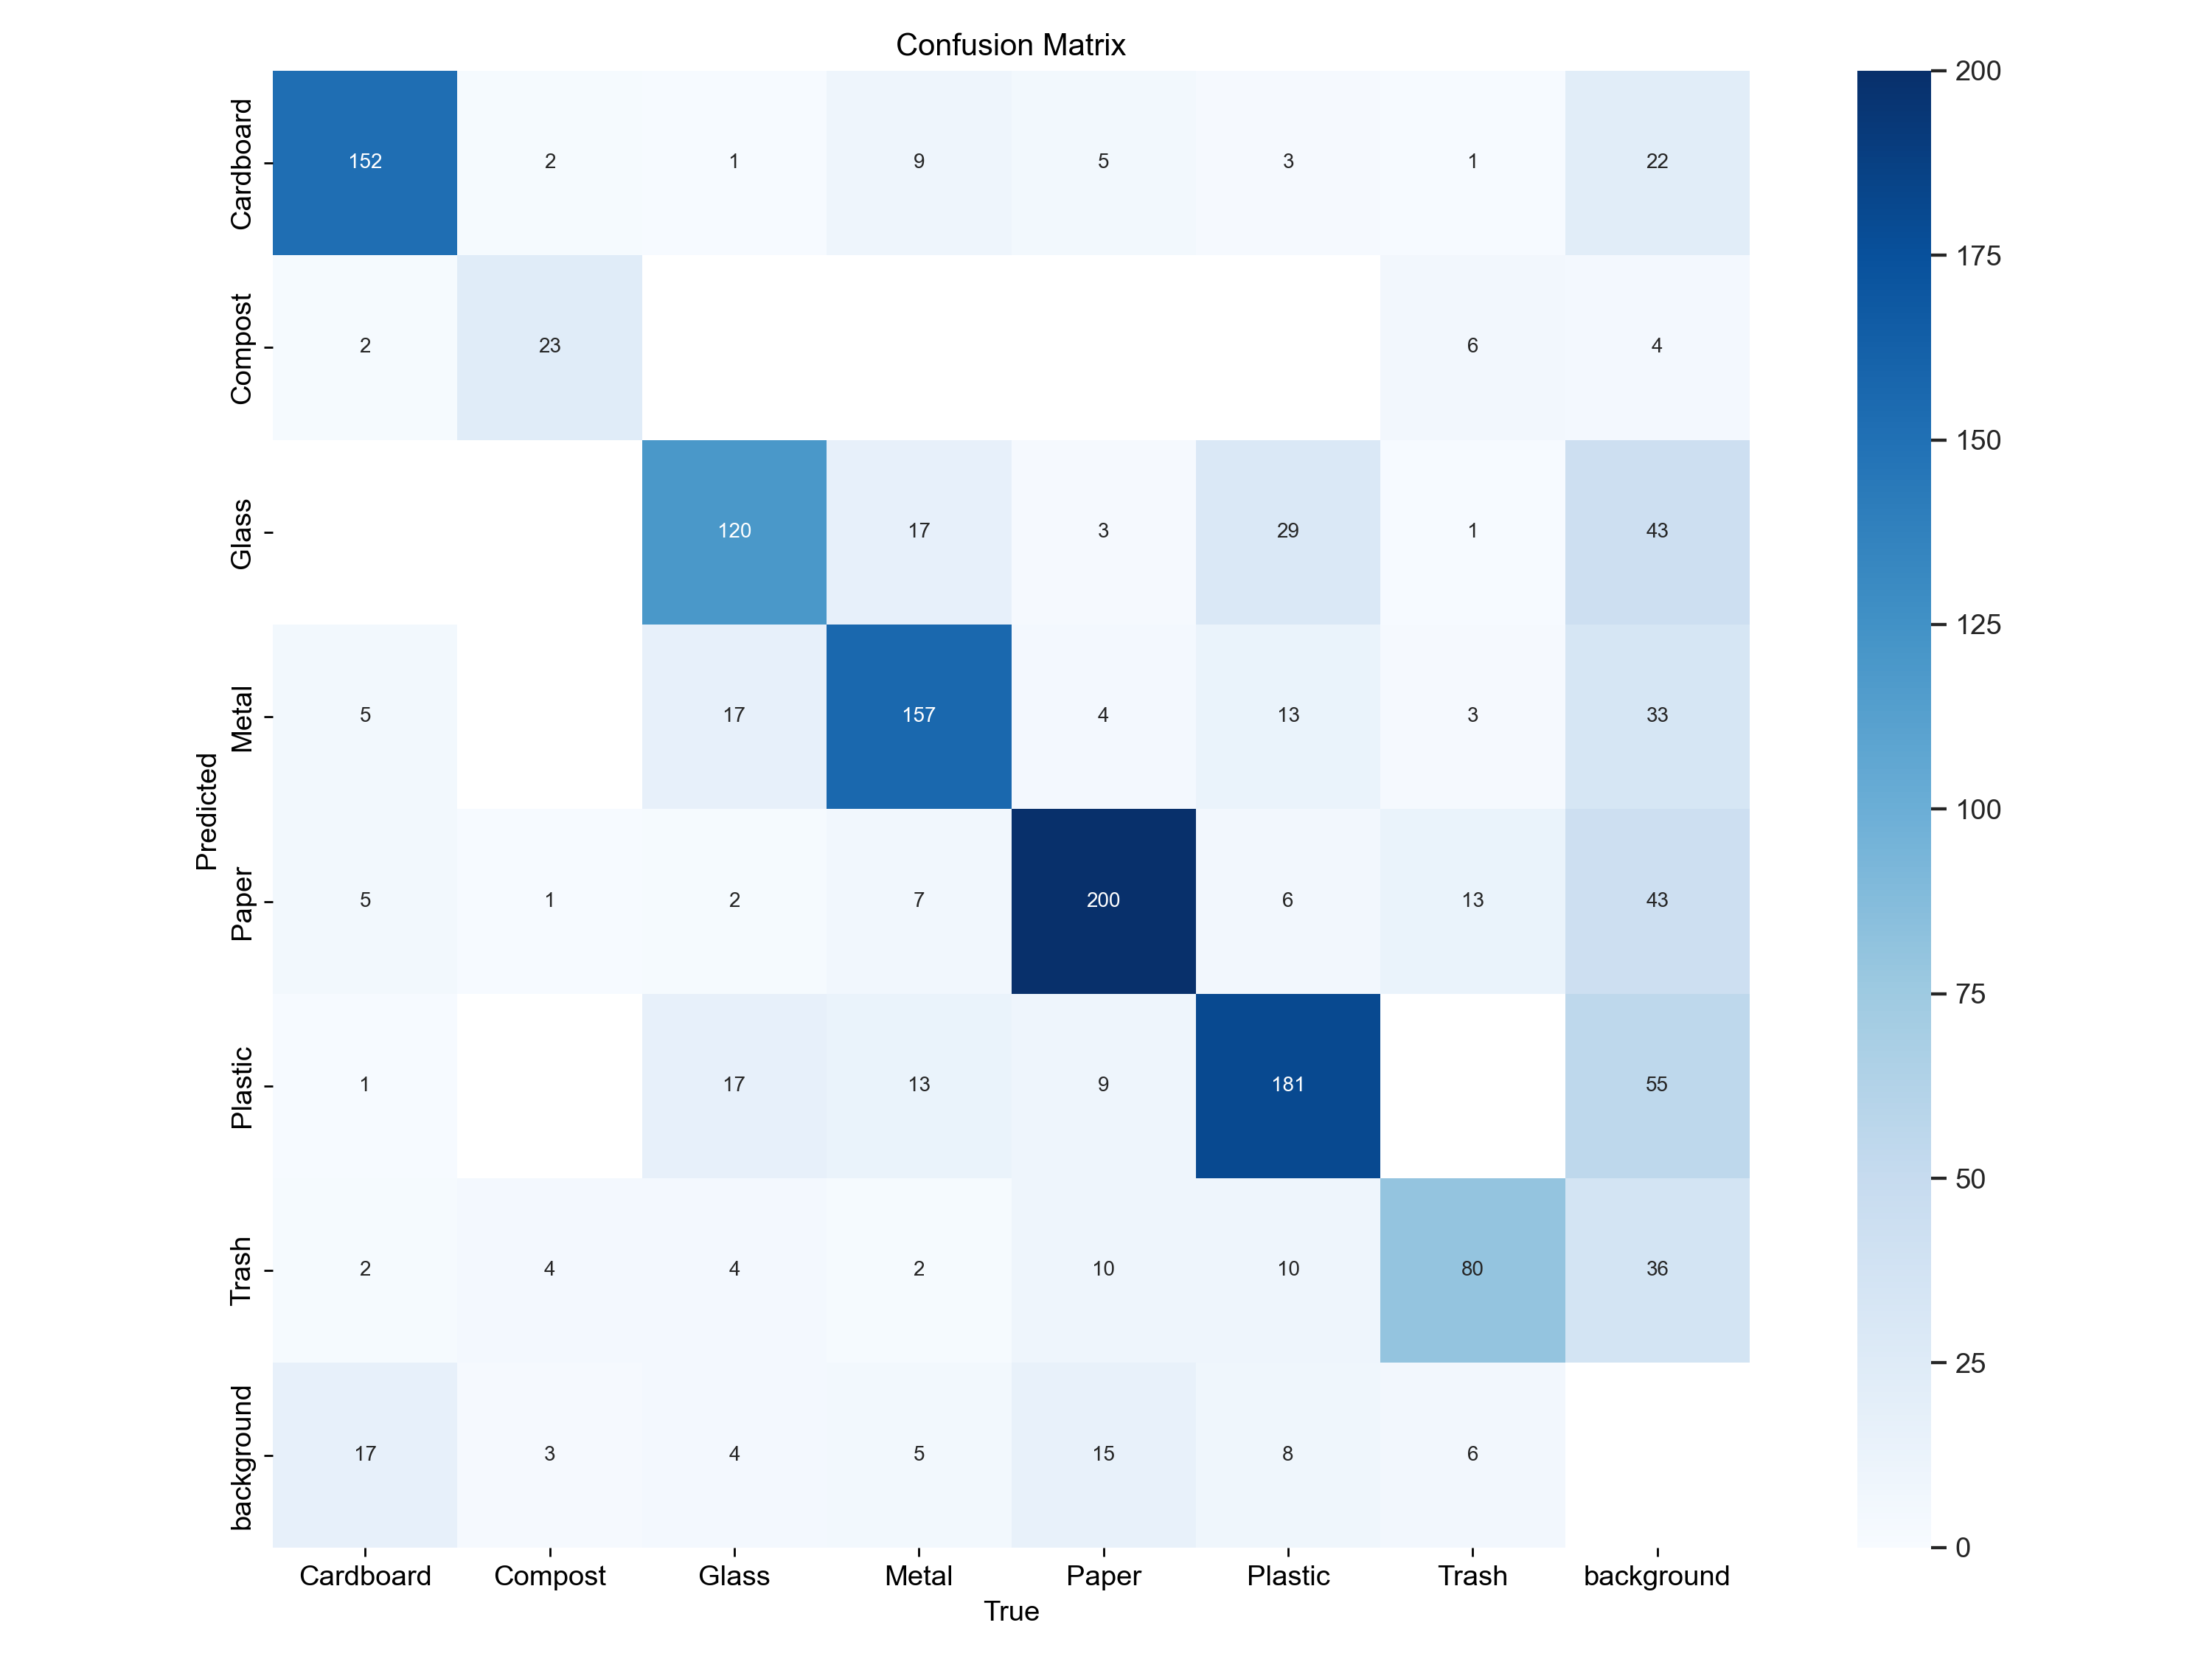

In [ ]:
%cd {HOME}
from IPython.display import Image
#Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)
Image(filename=f"{curr_train}/confusion_matrix.png",width=600)

c:\Users\Willie\Documents\coding\ML\GEEN1400-Final-Project


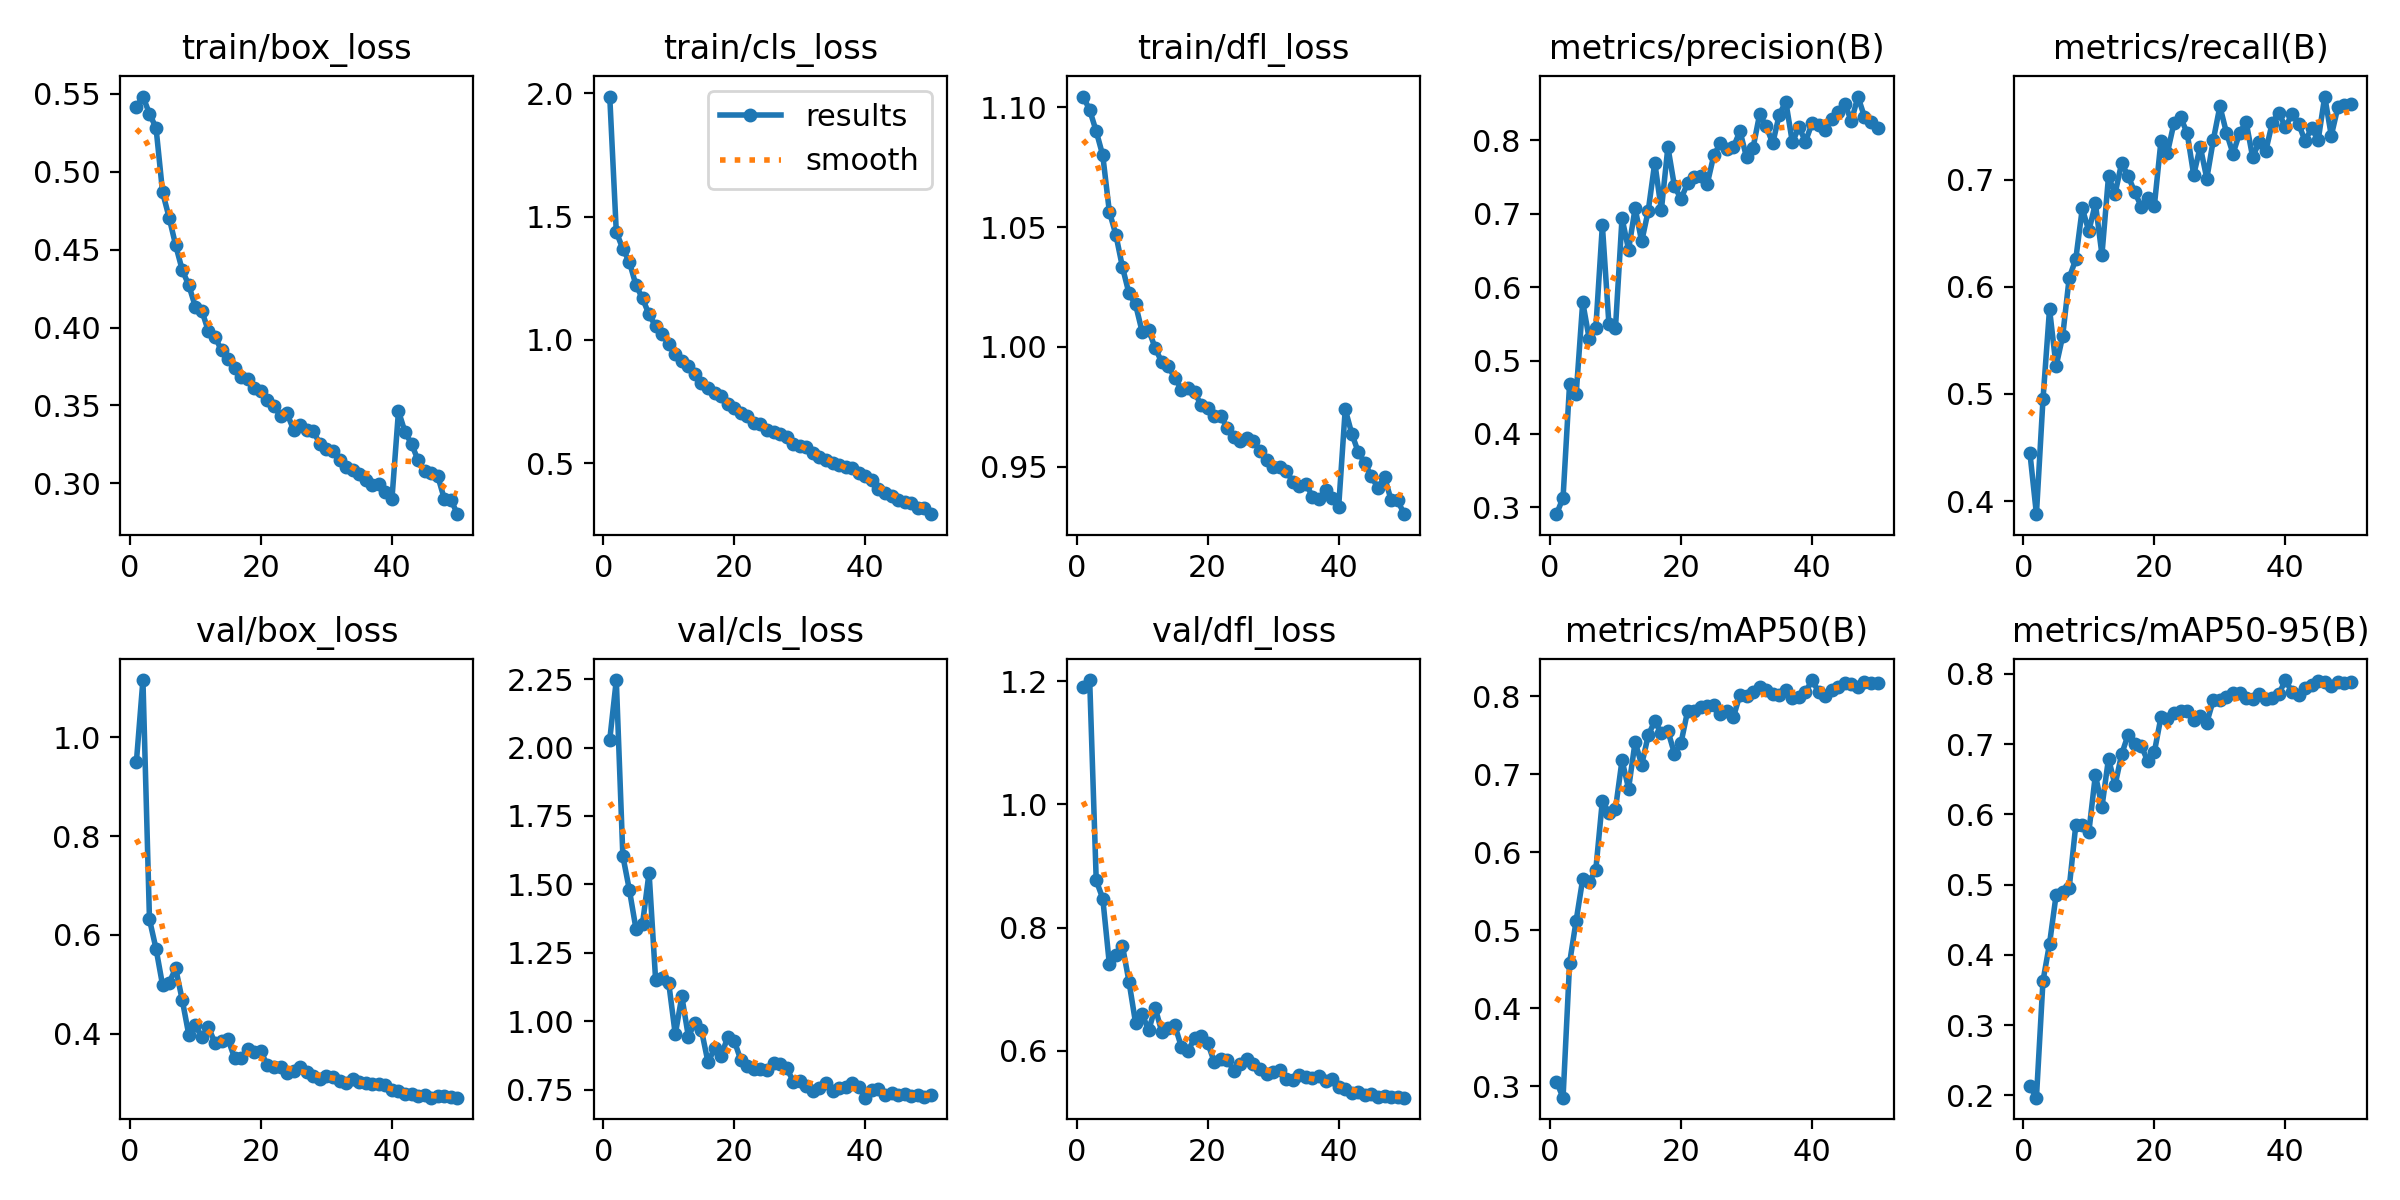

In [ ]:
%cd {HOME}
Image(filename=f'{curr_train}/results.png', width=600)

c:\Users\Willie\Documents\coding\ML\GEEN1400-Final-Project


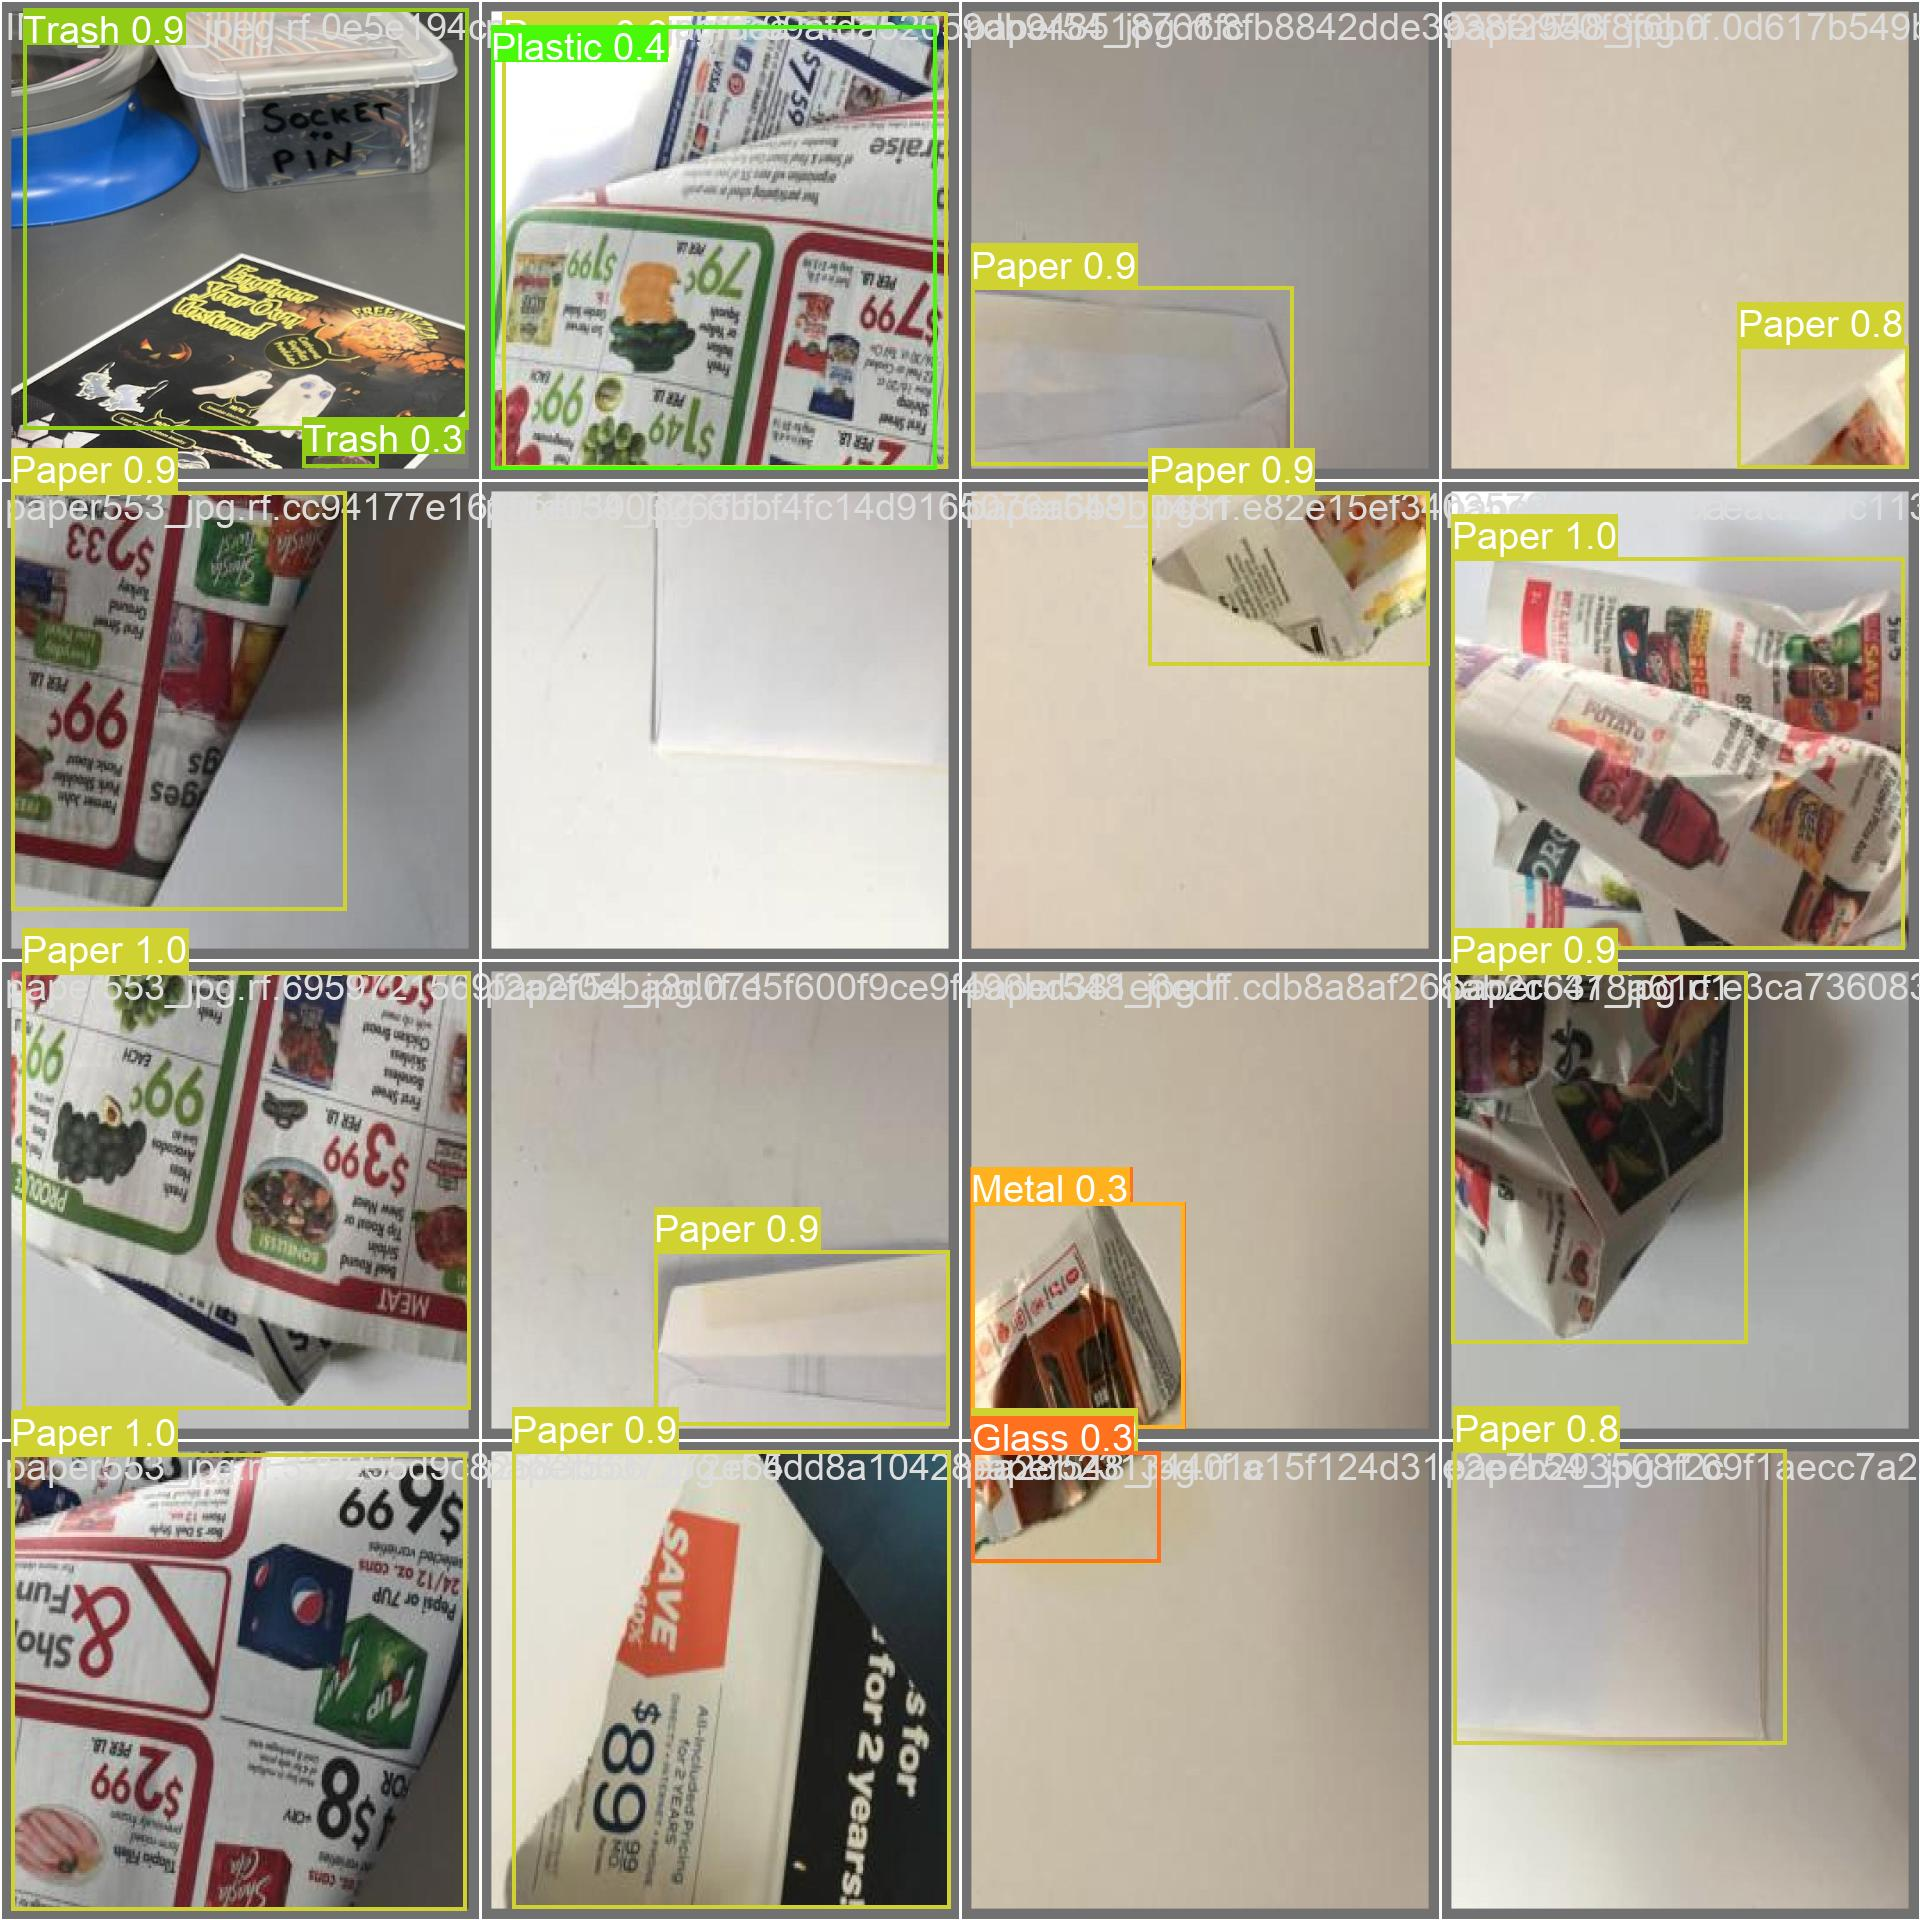

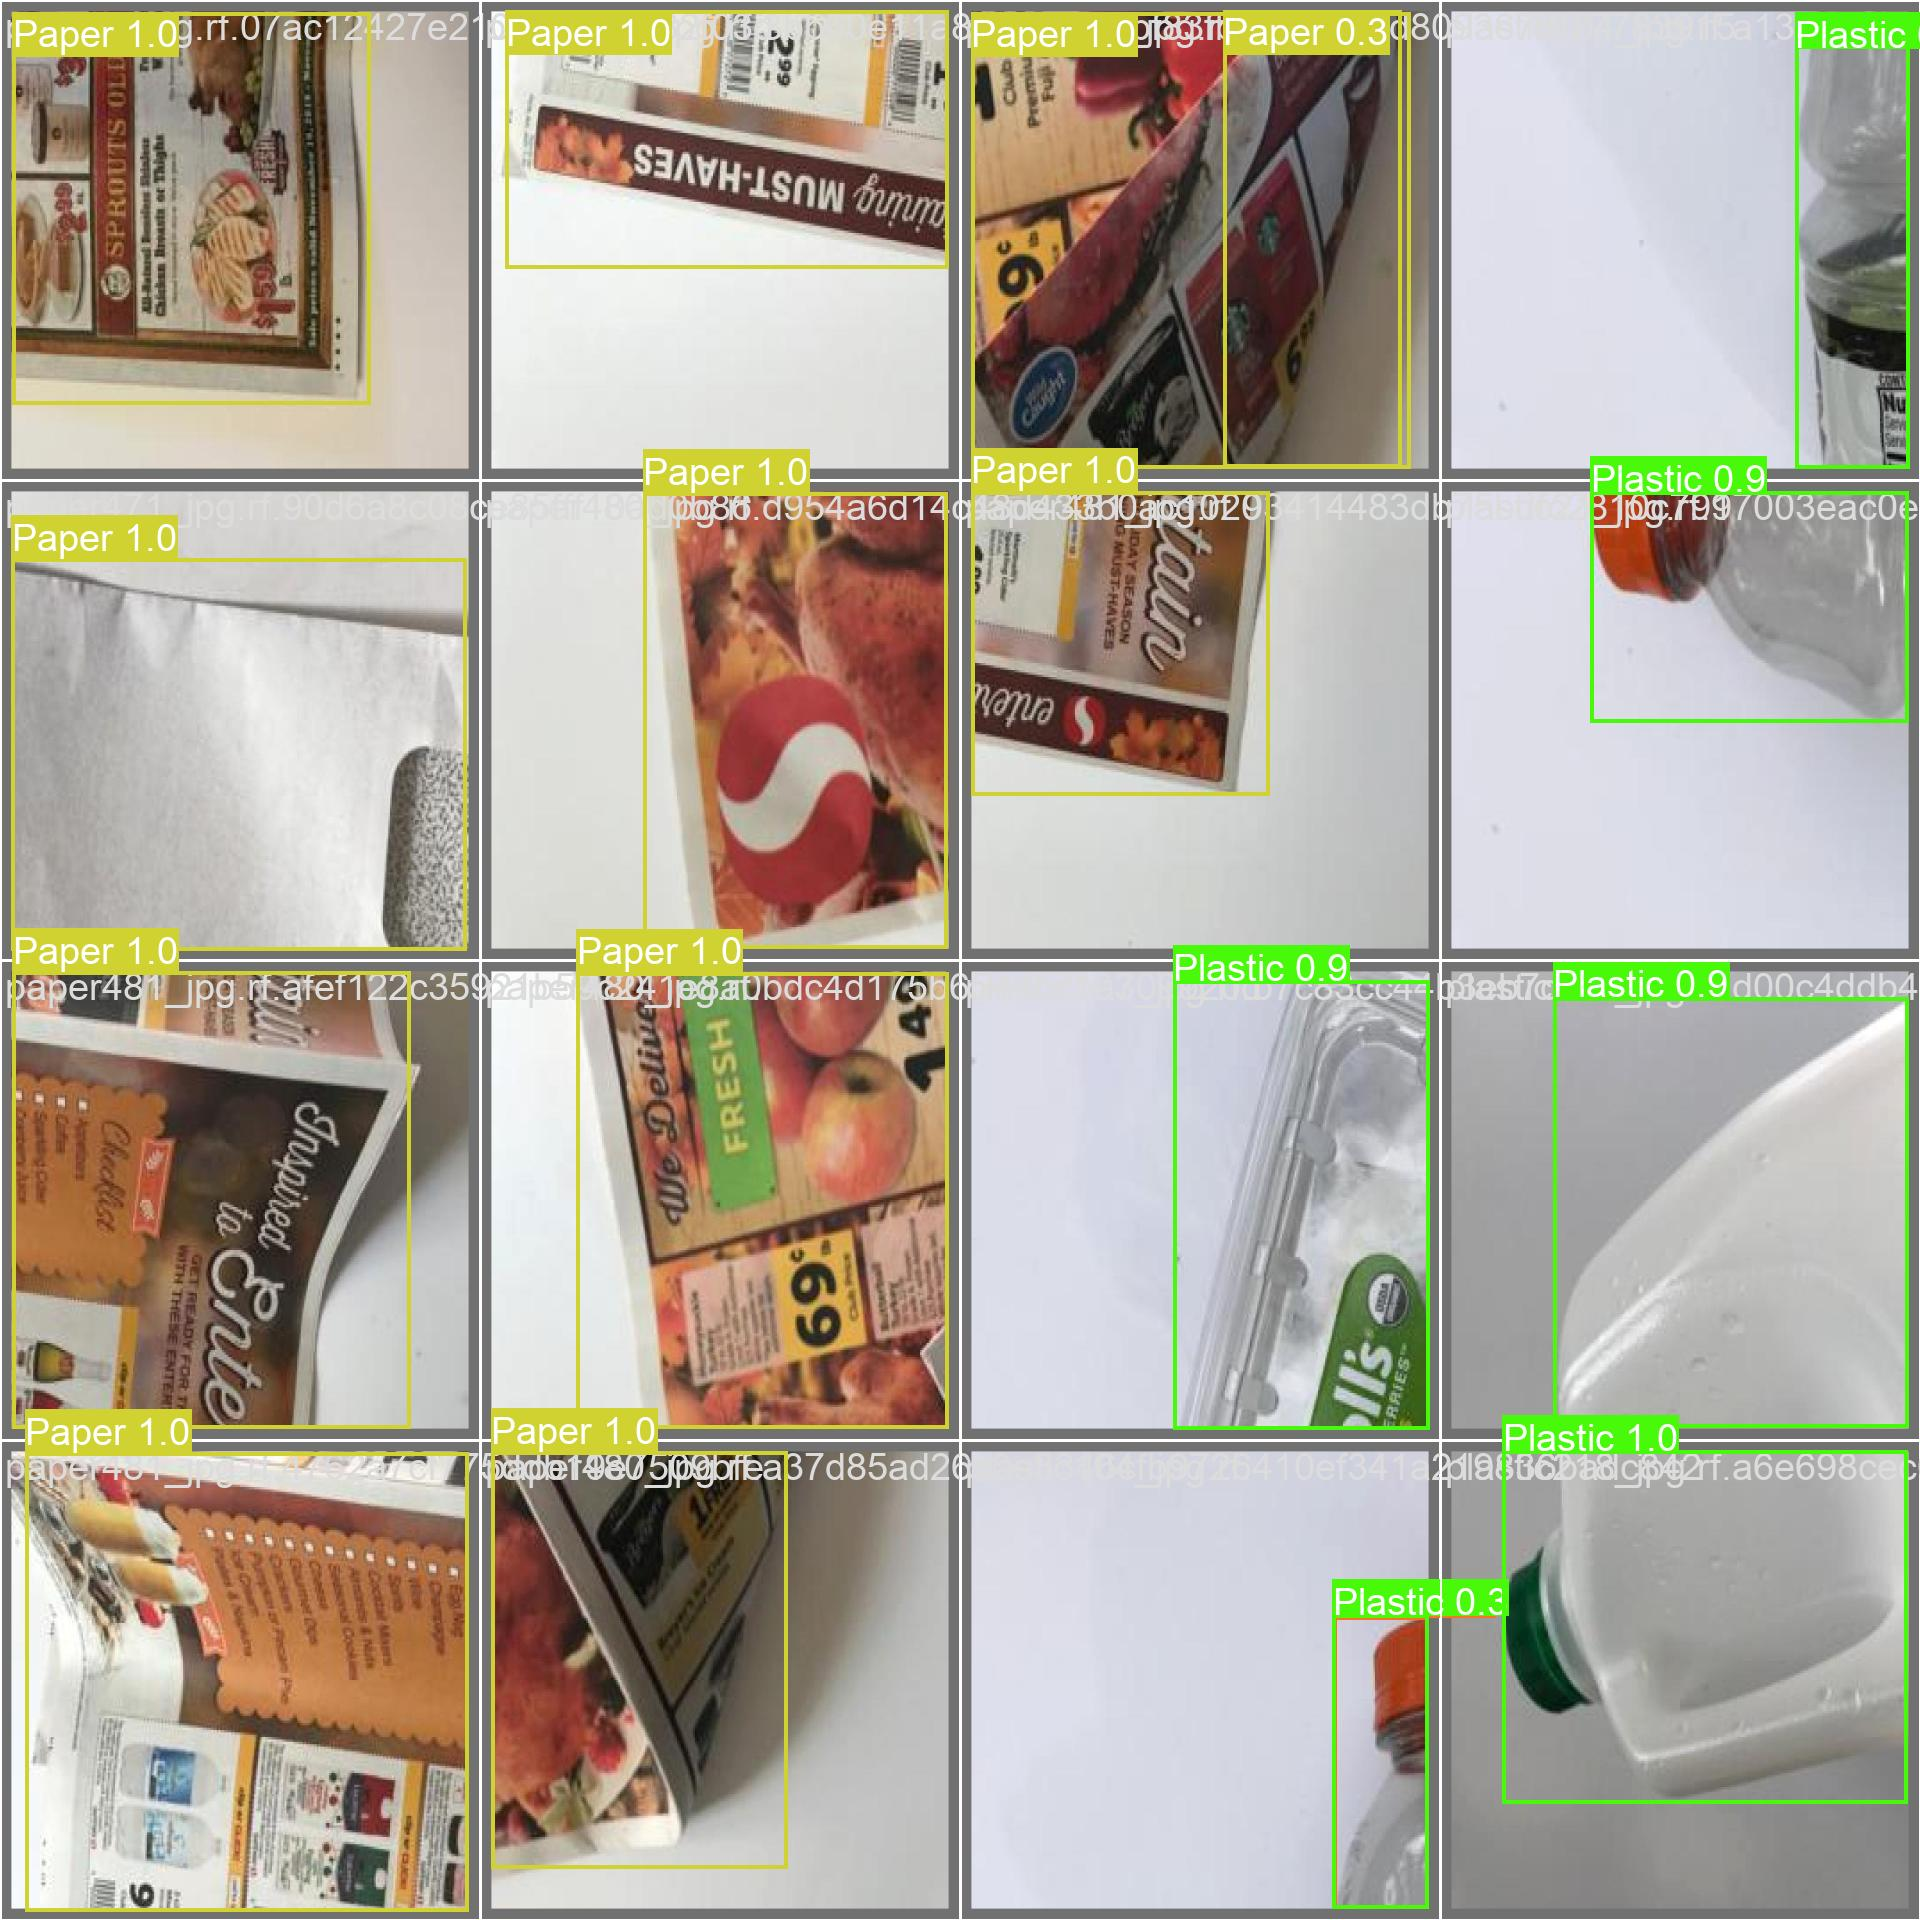

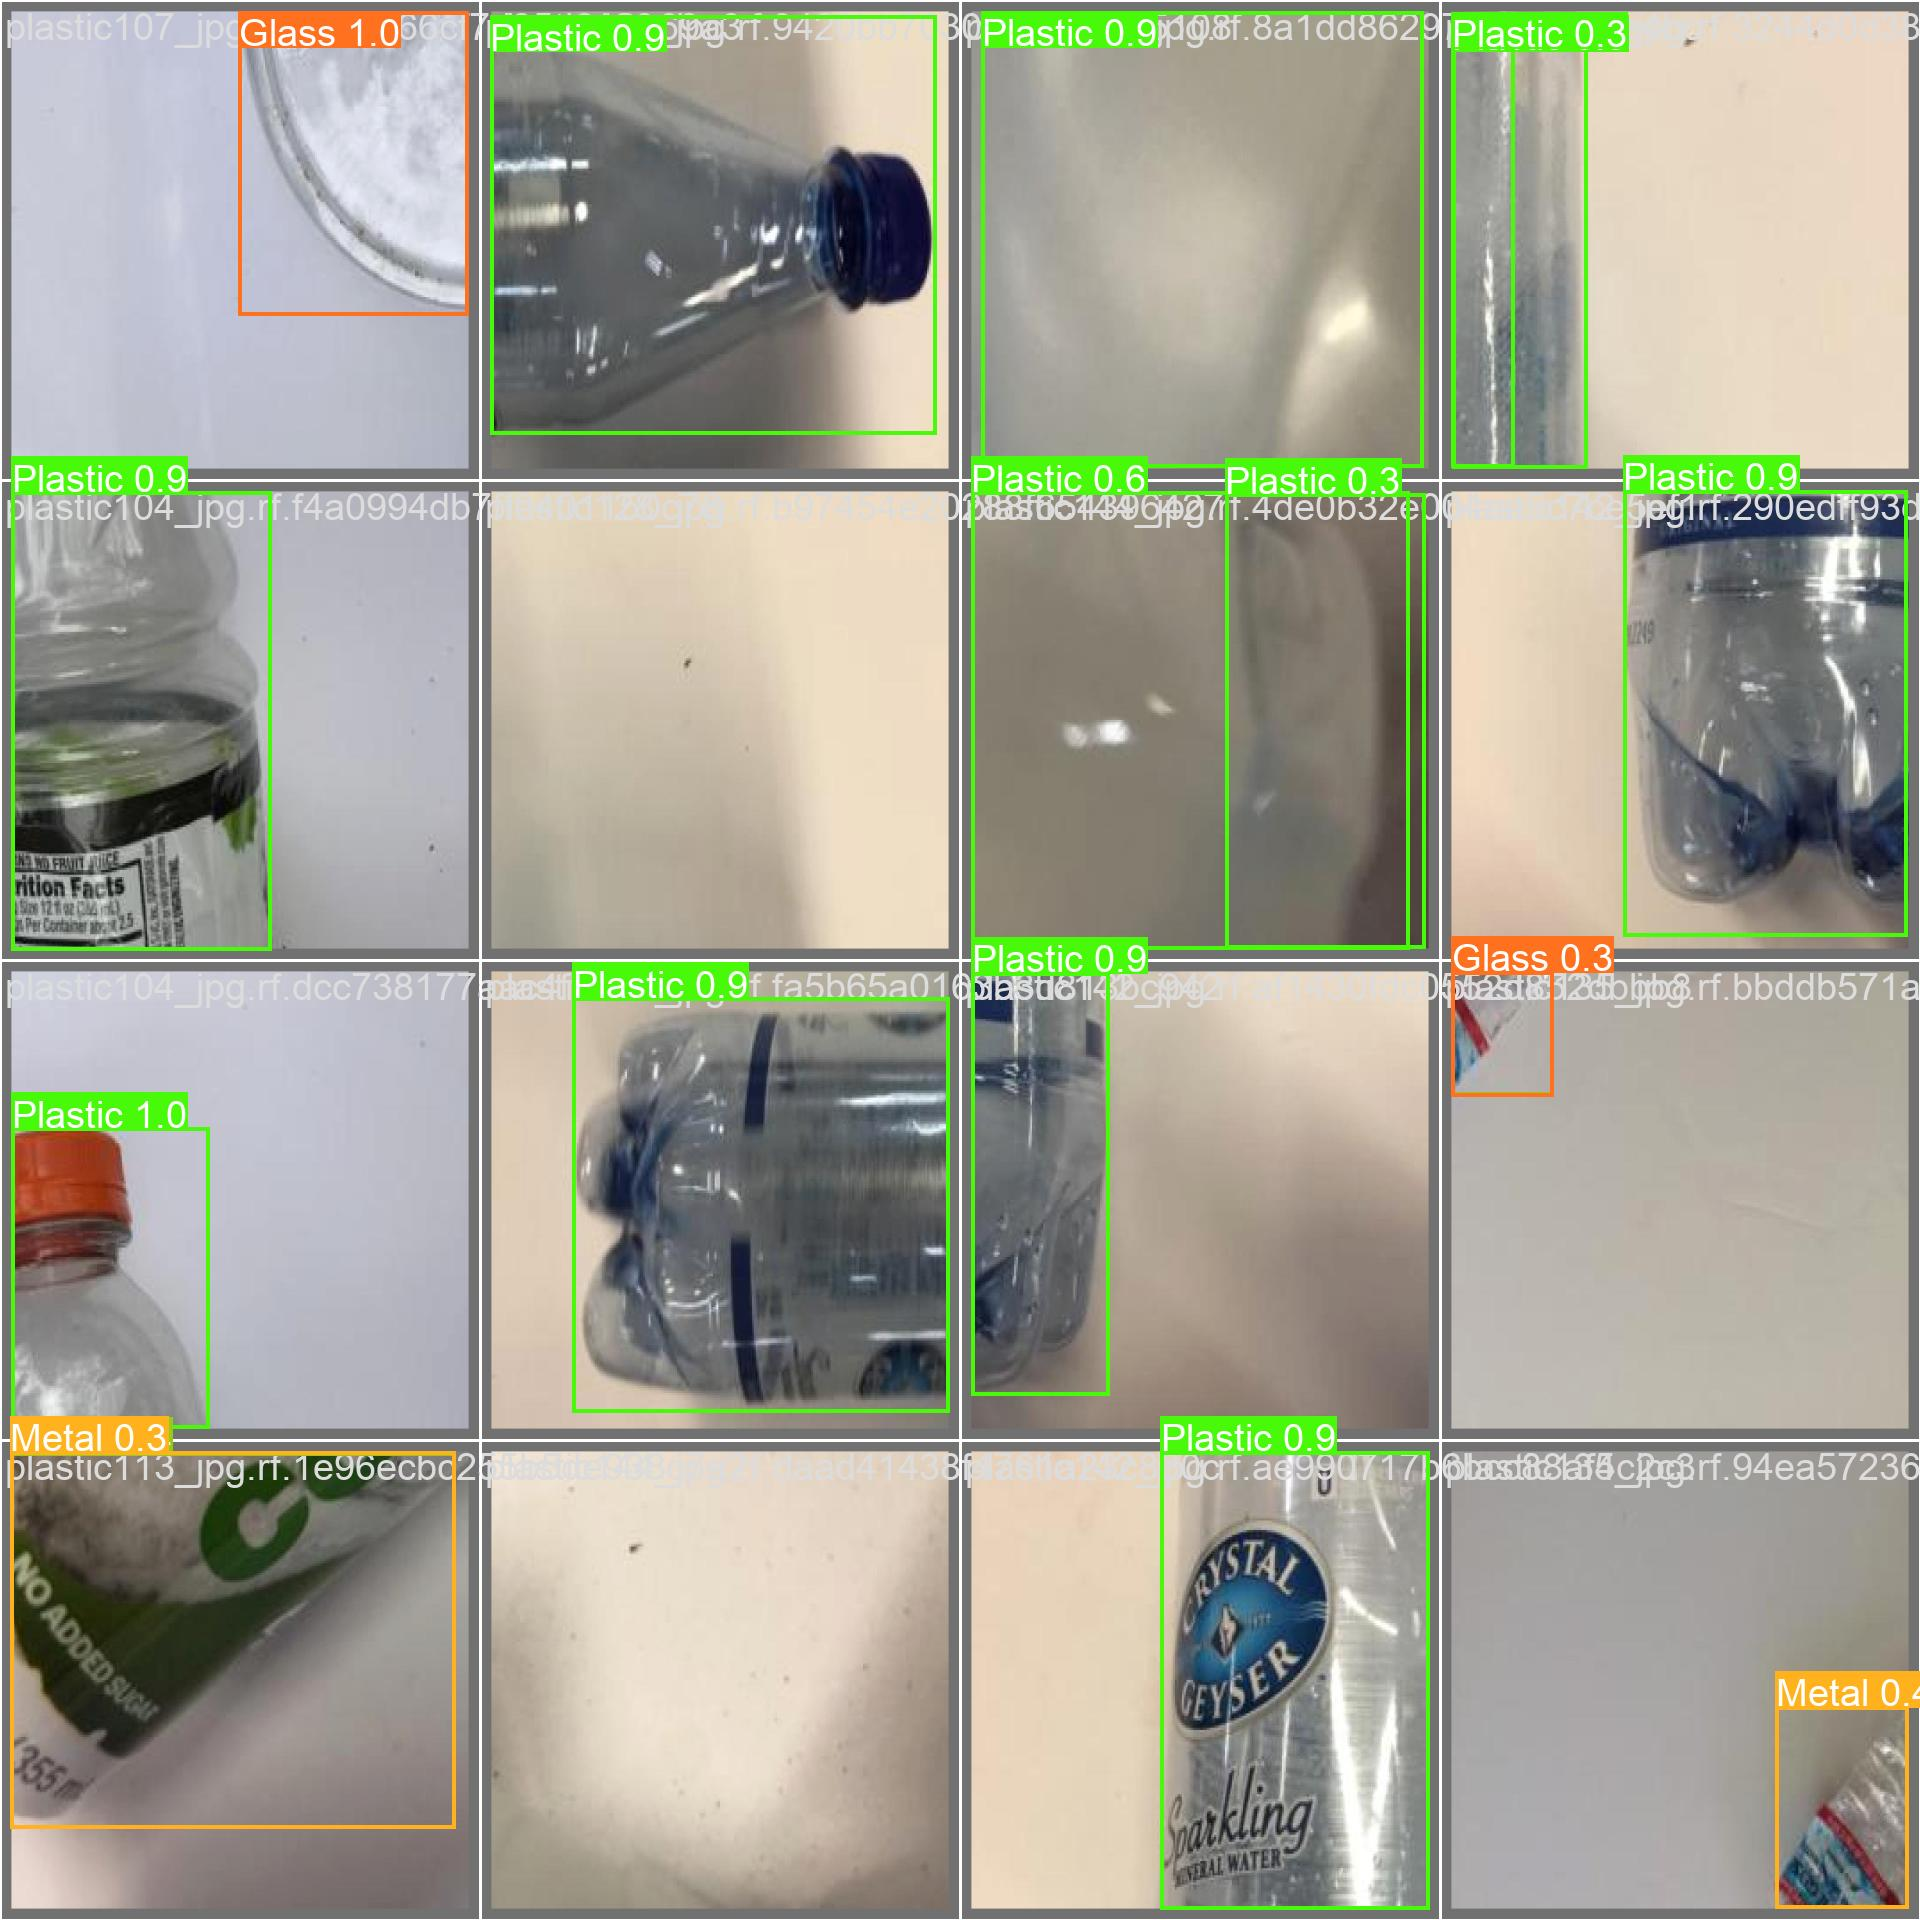

In [ ]:
%cd {HOME}
valbatch0 = Image(filename=f'{curr_train}/val_batch0_pred.jpg', width=600)
valbatch1 = Image(filename=f'{curr_train}/val_batch1_pred.jpg', width=600)
valbatch2 = Image(filename=f'{curr_train}/val_batch2_pred.jpg', width=600)
display.display(valbatch0,valbatch1,valbatch2)